In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats.distributions import chi2
from matplotlib import pyplot as plt

In [41]:
from scipy import stats

In [42]:
data1 = pd.read_csv('LB_GP_TS.csv', sep=",")
data2 = pd.read_csv('Exon_intron_counts_data_normalizedbylibrarydepthonly_20200120.txt',sep=" ")

In [43]:
data_m = data1[data1['FBtr']=='FBtr0086860'].iloc[0][1:31].to_numpy()
data_p = data2[data2['FBgn'] == 'FBgn0034264'].iloc[0][31:61].to_numpy()

Y_m = data_m.astype(np.float64)
Y_p = data_p.astype(np.float64)

In [44]:
data_m = data1[data1['FBtr']=='FBtr0086860'].iloc[0][1:31].to_numpy()
data_p = data2[data2['FBgn'] == 'FBgn0034264'].iloc[0][31:61].to_numpy()

Y_m = data_m.astype(np.float64)
Y_p = data_p.astype(np.float64)

In [53]:
stats.pearsonr(Y_m[25:30], Y_p[25:30])

(0.4759236087818228, 0.41775879324943477)

In [46]:
t0 = np.array((95.0,105.0,115.0,125.0,145.0,160.0,175.0,190.0,205.0,220.0))
rep_no = 3
t = np.hstack((t0,t0,t0))[:,None]

In [48]:
Y_p

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04557938, 0.        , 0.04267558,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02762285, 0.        , 0.0462261 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02712014, 0.        ])

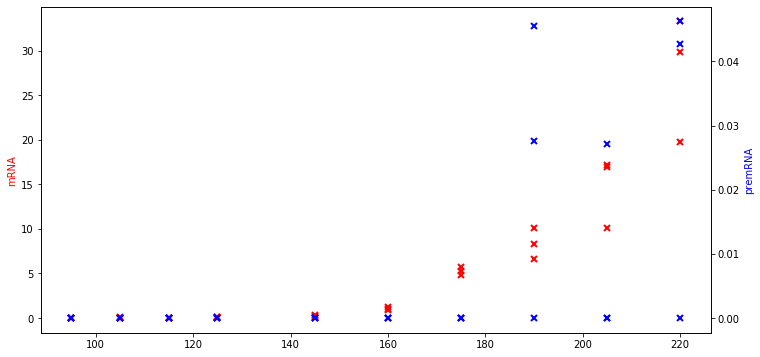

In [47]:
# Plot predicted model
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_ylabel('mRNA', color='r')
ax1.plot(t.flatten(), Y_m.flatten(), 'rx', mew=2)

ax2 = ax1.twinx()
ax2.set_ylabel('premRNA', color='b')
ax2.plot(t.flatten(), Y_p.flatten(), 'bx', mew=2)


In [54]:
res = pd.read_csv('filtered_genes_zygotic_tr_95_genes.csv',sep=",") #mrna

In [55]:
#2 * (alt_log_likelihood - null_log_likelihood)
def likelihood_ratio(ll_alt, ll_null):
    return(2*(ll_alt-ll_null))

In [56]:
LR = likelihood_ratio(np.asarray(164.287227, dtype=np.float64),np.asarray(195.982348, dtype=np.float64))
p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1 (alt one more degree of freedome than null)
print('p: %.30f' % p) 

p: 1.000000000000000000000000000000


In [57]:
#res = pd.read_csv('filtered_genes_unnormalized_data.csv',sep=",") #mrna

In [58]:
res

,genesID,trID,rbf_mrna,noise_mrna,loglik_ratio_mrna,rbf_premrna,noise_premrna,loglik_ratio_premrna,lengthscale_rbf_mrna,variance_rbf_mrna,variance_noise_mrna,lengthscale_rbf_premrna,variance_rbf_premrna,variance_noise_premrna
0,FBgn0000071,FBtr0081619,164.287227,195.982348,-31.695121,-10.921879,0.907462,-11.829340,51.747545,0.047611,14905.936667,51.747545,0.047611,0.053885
1,FBgn0000071,FBtr0081620,113.795550,142.324536,-28.528986,-10.921879,0.907462,-11.829340,51.747545,0.047611,553.227396,51.747545,0.047611,0.053885
2,FBgn0000117,FBtr0332583,86.736700,108.248938,-21.512238,107.156143,135.805543,-28.649400,18.676153,355.634795,79.718306,18.676153,355.634795,410.863236
3,FBgn0000163,FBtr0343764,51.626557,79.896908,-28.270351,130.260617,155.990121,-25.729504,24.888503,1403.845124,12.035775,24.888503,1403.845124,1049.663981
4,FBgn0000180,FBtr0079929,132.034786,159.977112,-27.942326,129.983541,164.094539,-34.110998,28.437434,2795.601459,1573.559547,28.437434,2795.601459,1800.786996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,FBgn0283521,FBtr0089344,107.682464,125.833441,-18.150977,152.150955,163.377029,-11.226073,0.058684,2517.629600,216.415424,0.058684,2517.629600,2386.159377
553,FBgn0283521,FBtr0089362,111.548018,132.176933,-20.628915,152.150955,163.377029,-11.226073,0.058684,2517.629600,312.588556,0.058684,2517.629600,2386.159377
554,FBgn0283741,FBtr0302655,59.340377,70.479563,-11.139186,168.585914,179.060444,-10.474530,0.060844,6988.626582,6.419256,0.060844,6988.626582,3861.756432
555,FBgn0283741,FBtr0332901,54.617081,69.012029,-14.394948,168.585914,179.060444,-10.474530,0.060844,6988.626582,5.820130,0.060844,6988.626582,3861.756432


In [59]:
genes = []
transcripts = []

In [60]:
res['loglik_ratio_mrna'].iloc[i]>20 

NameError: name 'i' is not defined

In [69]:
for i in range(0,557):
    LR = likelihood_ratio(-np.asarray(res['rbf_mrna'].iloc[i], dtype=np.float64),-np.asarray(res['noise_mrna'].iloc[i], dtype=np.float64))
    p = chi2.sf(LR, 1) # L2 has 1 DoF more than L1
    if(p>0.05):
        print(res['genesID'].iloc[i])
        print(res['trID'].iloc[i])
        print('p: %.30f' % p) 
    if(res['loglik_ratio_mrna'].iloc[i]>20 and res['loglik_ratio_premrna'].iloc[i]>20):
        genes.append(res['genesID'].iloc[i])
        transcripts.append(res['trID'].iloc[i])

FBgn0032170
FBtr0343739
p: 0.173656689855148232970449839740
FBgn0035397
FBtr0072998
p: 0.137481437723125488048481201986
FBgn0037550
FBtr0339725
p: 0.290261139365475928642013059289
FBgn0050163
FBtr0343491
p: 0.070079099849051959547630019642
FBgn0051485
FBtr0081662
p: 0.256853236790860750549114754904
FBgn0261822
FBtr0079573
p: 0.095172757756125117567513882477


In [16]:
genes

[]

In [35]:
for i in range(0,249):
    if(res_Nuha_mrna['log_likelihood_ratio'].iloc[i]>20 and res_Nuha_premrna['log_likelihood_ratio'].iloc[i]>20):        
        genes_Nuha.append(res_Nuha_mrna['GeneID'].iloc[i])       

In [36]:
for i in range(0,249):
    if(res['loglik_ratio_mrna'].iloc[i]>20 and res['loglik_ratio_premrna'].iloc[i]>20):
        genes_Yuliya.append(res['genesID'].iloc[i])

In [43]:
genes_Yuliya = pd.DataFrame(np.asarray(genes_Yuliya))
genes_Nuha = pd.DataFrame(np.asarray(genes_Nuha))

In [47]:
genes_Yuliya.columns = ['Name']
genes_Nuha.columns = ['Name']

In [48]:
genes_Yuliya.to_csv('genes_Yuliya.csv',index=False)
genes_Nuha.to_csv('genes_Nuha.csv',index=False)